In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
# we have imported all libraries which are used in this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
#reading the data file into vehicle_data variable using pandas read_csv function
vehicle_data=pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')

In [4]:
vehicle_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
# Information about data present in Dataset
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Statistical information about features present in a dataset
vehicle_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
# Now we are going to check for missing or null values in a dataset
vehicle_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# now we check for duplicated values in a data set
vehicle_data.duplicated().sum()

2

In [9]:
# We are checking for 2 duplicates values in the dataset
vehicle_data[vehicle_data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [10]:
# We are dropping duplicate values from dataset
vehicle_data.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
vehicle_data.reset_index(drop=True)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


this data set contain a column named as year this shows the launched year of car. in current form this data is not valuable for analysis. so we create a new features by using this features to extract valuable information. so we going to create a new feature "Current_Year", temperorily so we can subtract the value of launched year from current year in order to get car_age.

In [12]:
vehicle_data['Current_Year']=2022

In [13]:
vehicle_data['Car_Age']=vehicle_data['Current_Year'] - vehicle_data['Year']

In [14]:
vehicle_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [15]:
#Dropping unnecessary columns from Dataset
vehicle_data.drop(columns=['Car_Name','Year','Current_Year'],inplace=True)

In [16]:
vehicle_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


You can see that there are 3 columns which contain values in string form. so for analysis we are going to change them into numeric form.

In [17]:
vehicle_data=pd.get_dummies(vehicle_data,columns=['Fuel_Type'],drop_first=True)

In [18]:
vehicle_data=pd.get_dummies(vehicle_data,columns=['Transmission','Seller_Type'])

In [19]:
vehicle_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual
0,3.35,5.59,27000,0,8,0,1,0,1,1,0
1,4.75,9.54,43000,0,9,1,0,0,1,1,0
2,7.25,9.85,6900,0,5,0,1,0,1,1,0
3,2.85,4.15,5200,0,11,0,1,0,1,1,0
4,4.60,6.87,42450,0,8,1,0,0,1,1,0


As now our data is cleaned and prepared for analysis. we do exploratory data analysis

<AxesSubplot:xlabel='Car_Age', ylabel='Selling_Price'>

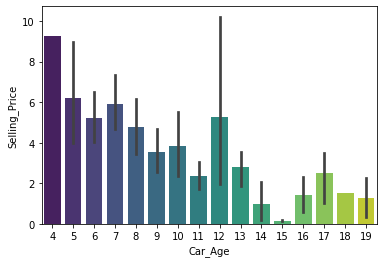

In [20]:
sns.barplot(x='Car_Age',y='Selling_Price',data=vehicle_data,palette='viridis')

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

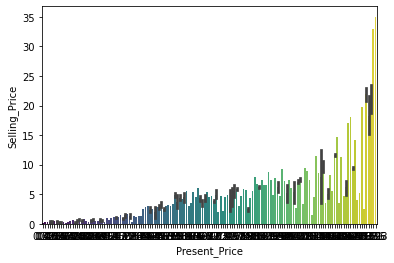

In [21]:
sns.barplot(x='Present_Price',y='Selling_Price',data=vehicle_data,palette='viridis')

This bar graph shows that selling price and present price are strongly co-linear as the present prices increase there is also increase in selling price

array([[<AxesSubplot:title={'center':'Selling_Price'}>,
        <AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Kms_Driven'}>],
       [<AxesSubplot:title={'center':'Owner'}>,
        <AxesSubplot:title={'center':'Car_Age'}>,
        <AxesSubplot:title={'center':'Fuel_Type_Diesel'}>],
       [<AxesSubplot:title={'center':'Fuel_Type_Petrol'}>,
        <AxesSubplot:title={'center':'Transmission_Automatic'}>,
        <AxesSubplot:title={'center':'Transmission_Manual'}>],
       [<AxesSubplot:title={'center':'Seller_Type_Dealer'}>,
        <AxesSubplot:title={'center':'Seller_Type_Individual'}>,
        <AxesSubplot:>]], dtype=object)

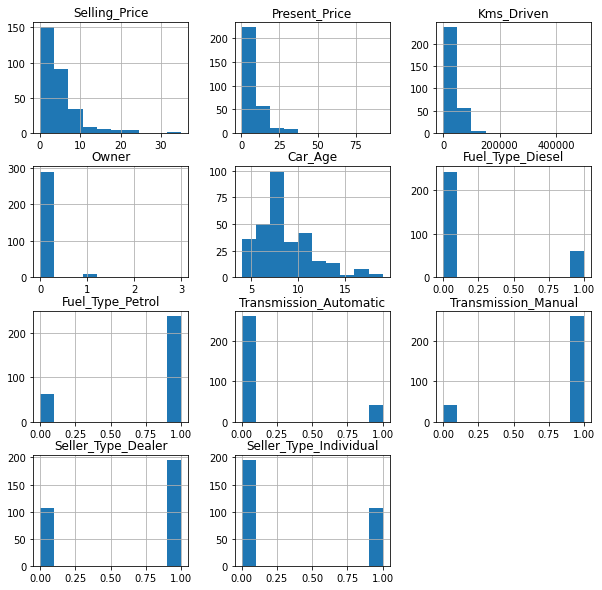

In [22]:
vehicle_data.hist(figsize=(10,10))

<AxesSubplot:>

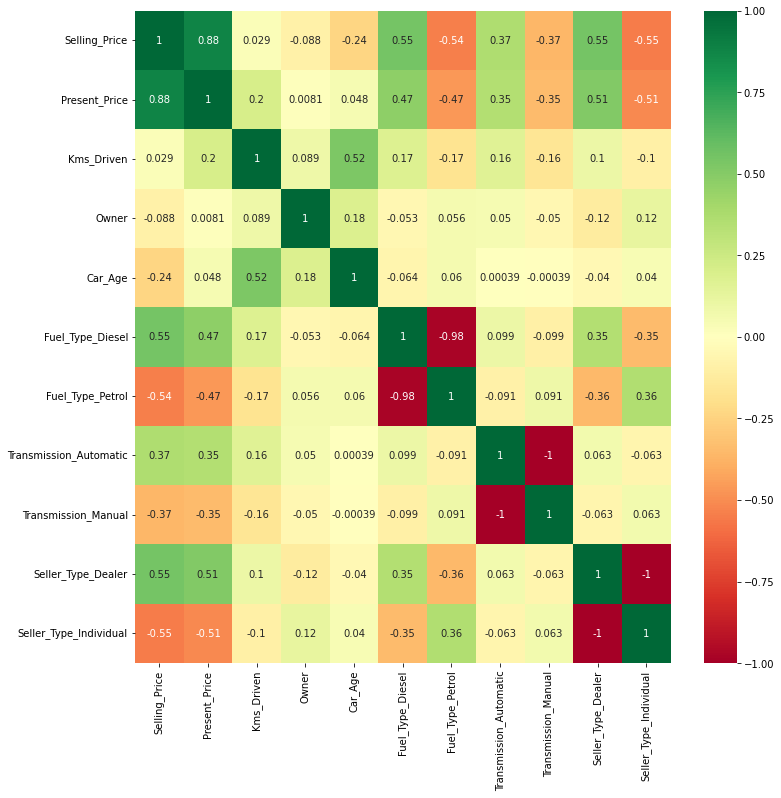

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(vehicle_data.corr(),annot=True,cmap="RdYlGn")


This Graph shows the corelation of different variables with oneanother. from this we can also get information that how how dependent variable is related with other independent variables.

In [24]:
vehicle_data.corr()['Selling_Price']

Selling_Price             1.000000
Present_Price             0.878983
Kms_Driven                0.029187
Owner                    -0.088344
Car_Age                  -0.236141
Fuel_Type_Diesel          0.552339
Fuel_Type_Petrol         -0.540571
Transmission_Automatic    0.367128
Transmission_Manual      -0.367128
Seller_Type_Dealer        0.550724
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

Now we can save the dependent variable into y variable then drop dependent variable from dataset and save remaining variables into x variable

In [25]:
y = vehicle_data['Selling_Price']
x = vehicle_data.drop('Selling_Price',axis=1)

In [26]:
print(x.shape)
print(y.shape)

(301, 10)
(301,)


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

We have import train_test_split function from sklearn library and then splited dataset into x_train,x_test,y_train,y_test.

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 10)
(61, 10)
(240,)
(61,)


In [29]:
# we have imported linear regression algorithms from sckit-learn labrary in the start 
lm = LinearRegression()

In [30]:
lm.fit(x_train,y_train)

LinearRegression()

We have fitted the training data into model. and then run the model on given data.

In [31]:
lm.score(x_test,y_test)

0.8625260513315248

the accuracy of model is 0.86 which shows that linear regression is giving good results for this model.

In [32]:
from sklearn.linear_model import Lasso
lo = Lasso()

In [33]:
lo.fit(x_train,y_train)

Lasso()

In [34]:
lo.score(x_test,y_test)

0.8544763192780581

#### the accuracy of model is 0.85 which shows that lasso is also giving good results for this model.

### The Score of Regression Model is 0.86
### The Score of Lasso Model is 0.85


## Conclusions:
#### •	Present price of a car directly influences Selling Price prediction. Both are highly correlated and here directly proportional to each other.
#### •	Resale value of Automatic vehicle is more than that of a Manual vehicle.
#### •	Car age is effecting negatively as the Selling Price decreases for an older car.
#### •	Resale value of cars with Fuel type Diesel is higher.
#### •	Resale value of car with Seller type Dealer is higher than seller type individual
